<h1 style='color:blue' align = 'center'>Stock price prediction of Large cap companies using historical data and news headlines</h1>


**The datasets used in this notebook are downloaded from here : https://github.com/TVR28/Final_Year_Project**

<h2 style='color:blue'>EDA on Historical  Stock data for Amazon</h2>


In [1]:
#Importing libraries
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import plotly.graph_objs as go
from plotly.offline import plot

#for plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

**Reading Data**

In [ ]:
from google.colab import files
uploaded = files.upload()    #To upload files from local drive to colabs

Saving HistoricalData_AMZN.csv to HistoricalData_AMZN.csv


In [ ]:
#Reading data
import io
amzn = pd.read_csv(io.BytesIO(uploaded['HistoricalData_AMZN.csv']),encoding='ISO-8859-1')  
print(amzn)

            Date Close/Last   Volume      Open        High       Low
0     06/09/2021   $3281.15  2455530  $3272.87    $3297.58   $3270.7
1     06/08/2021   $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2     06/07/2021   $3198.01  2215756  $3197.33       $3208   $3172.2
3     06/04/2021   $3206.22  2249749     $3212       $3221  $3198.81
4     06/03/2021   $3187.01  2398293  $3204.23   $3214.435  $3184.03
...          ...        ...      ...       ...         ...       ...
2511  06/16/2011    $183.65  6025431   $185.74        $187   $181.59
2512  06/15/2011    $185.98  6310918   $188.04     $192.45    $185.3
2513  06/14/2011    $189.96  3952911   $188.99     $190.72   $187.07
2514  06/13/2011    $186.29  3867735   $186.81     $189.31   $184.86
2515  06/10/2011    $186.53  3753267   $189.25     $190.77   $186.28

[2516 rows x 6 columns]


In [ ]:
amzn.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,06/08/2021,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,06/07/2021,$3198.01,2215756,$3197.33,$3208,$3172.2
3,06/04/2021,$3206.22,2249749,$3212,$3221,$3198.81
4,06/03/2021,$3187.01,2398293,$3204.23,$3214.435,$3184.03
5,06/02/2021,$3233.99,2014524,$3223.1,$3235,$3208
6,06/01/2021,$3218.65,2430045,$3243.495,$3250.98,$3209.06
7,05/28/2021,$3223.07,2331509,$3242,$3247.99,$3219.7
8,05/27/2021,$3230.11,2561157,$3256,$3260.355,$3230.04
9,05/26/2021,$3265.16,2383986,$3274.591,$3295.73,$3258.51


In [ ]:
amzn.tail()

,Date,Close/Last,Volume,Open,High,Low
2511,06/16/2011,$183.65,6025431,$185.74,$187,$181.59
2512,06/15/2011,$185.98,6310918,$188.04,$192.45,$185.3
2513,06/14/2011,$189.96,3952911,$188.99,$190.72,$187.07
2514,06/13/2011,$186.29,3867735,$186.81,$189.31,$184.86
2515,06/10/2011,$186.53,3753267,$189.25,$190.77,$186.28


In [ ]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


<h2 style='color:blue'>Changing data types and renaming columns</h2>


In [ ]:

amzn['Date'] = pd.to_datetime(amzn['Date'])
#convert object type to float
amzn=amzn.rename(columns={'Close/Last':'Close'})
amzn['Close']=amzn['Close'].replace('[\$]','',regex=True).astype(float)
amzn[amzn.columns[3:]]=amzn[amzn.columns[3:]].replace('[\$]','',regex=True).astype(float)
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   float64       
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [ ]:
print(f'Dataframe contains stock prices from {amzn.Date.min()} to {amzn.Date.max()}')
print(f'Total no.of days = {(amzn.Date.max()- amzn.Date.min()).days} days')

Dataframe contains stock prices from 2011-06-10 00:00:00 to 2021-06-09 00:00:00
Total no.of days = 3652 days


In [ ]:
amzn.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,1063.464458,4.207630e+06,1063.903932,1074.999505,1051.288820
std,929.012084,2.295011e+06,930.056032,940.350978,917.969974
min,173.100000,8.813370e+05,169.620000,174.550000,166.970000
25%,306.772500,2.737498e+06,306.977500,310.787475,303.415500
50%,715.610000,3.615334e+06,715.610000,720.152500,711.240000
75%,1735.715000,4.936622e+06,1737.780000,1750.167500,1713.767500
max,3531.450000,2.412413e+07,3547.000000,3554.000000,3486.685000


<h2 style='color:blue'>Outlier Detection</h2>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



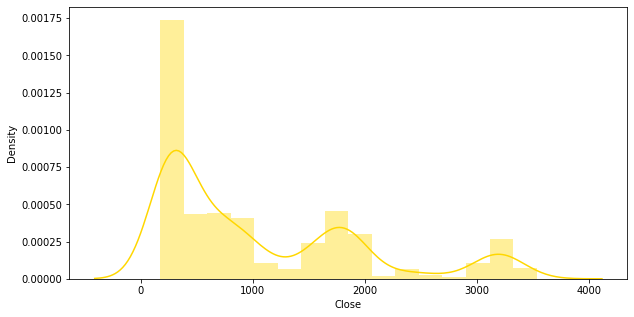

In [ ]:
#Outlier detection
plt.figure(figsize=(10,5))
sns.distplot(amzn['Close'],color = 'gold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



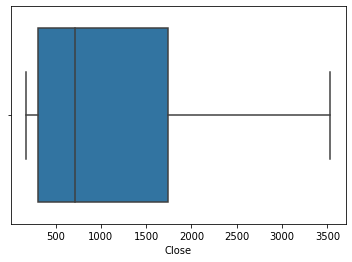

In [ ]:
sns.boxplot(amzn['Close'])

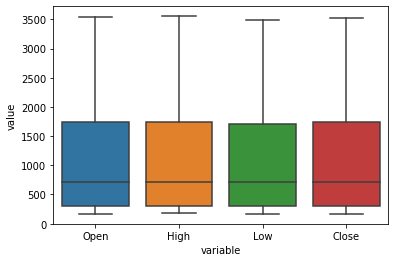

In [ ]:
col = ['Open','High','Low','Close']
ft = amzn[col]
sns.boxplot(x="variable", y="value",data=pd.melt(ft))

<h2 style='color:blue'>Outlier Removal using IQR</h2>


In [ ]:
Q1=amzn["Close"].quantile(0.25)
Q3=amzn["Close"].quantile(0.75)
print(Q1,Q3)
iqr=Q3-Q1
iqr

306.7725 1735.7150000000001


1428.9425

In [ ]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit,lower_limit)

3879.1287500000003 -1836.6412500000001


In [ ]:
new_df = amzn[amzn['Close'] < lower_limit] 
new_df.shape

(0, 6)

In [ ]:
#Trimming outliers
new_df = amzn[amzn['Close'] < upper_limit] 
new_df.shape

(2516, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

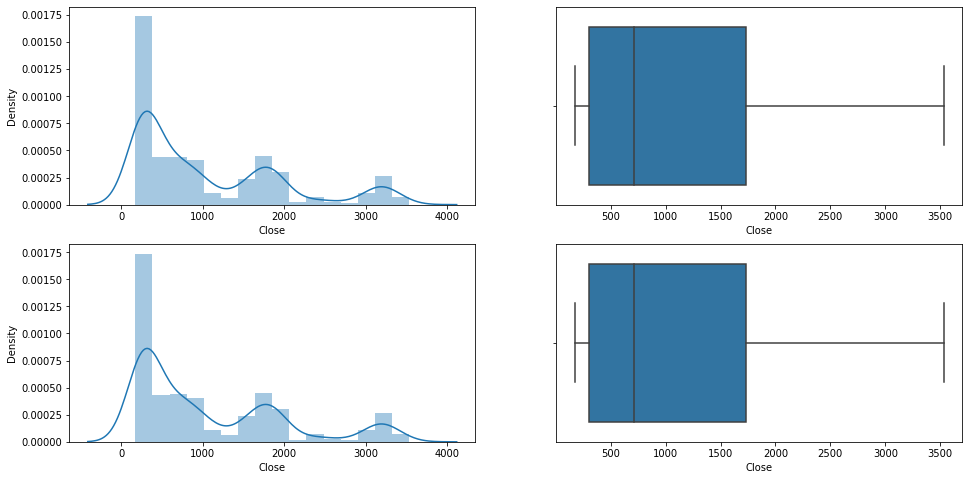

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(amzn['Close'])
plt.subplot(2,2,2)
sns.boxplot(amzn['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Close'])
plt.show()

In [ ]:
#Caping outliers
new_df_cap = amzn.copy()
new_df_cap['Close'] = np.where(
    new_df_cap['Close'] > upper_limit,upper_limit,
    np.where(new_df_cap['Close'] < lower_limit,lower_limit,
        new_df_cap['Close']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

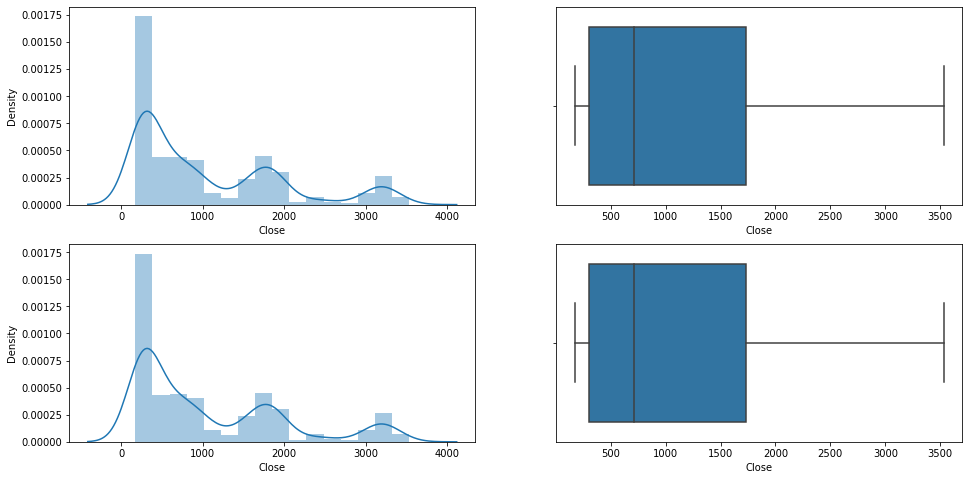

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(amzn['Close'])
plt.subplot(2,2,2)
sns.boxplot(amzn['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Close'])
plt.show()

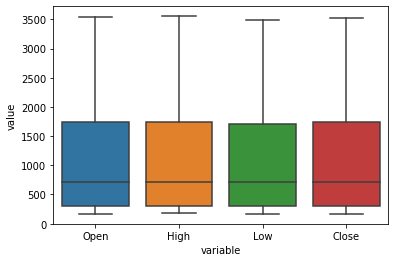

In [ ]:
col = ['Open','High','Low','Close']
ft = amzn[col]
sns.boxplot(x="variable", y="value",data=pd.melt(ft))  #Rechecking for outliers

**Therefore, form the above plot we can say our data is outlier free**

<h2 style='color:blue'>Data Visualization</h2>


In [ ]:
#Layout for the plot
layout=go.Layout(title='Stock prices of Amazon',xaxis=dict(title='Date',titlefont=dict(family='Courier New, monospace',size=19,color='#7f7f7f')) ,
                 yaxis=dict(title='Close',titlefont=dict(family='Courier New, monospace',size=19,color='#7f7f7f')))
amzn_data = [{'x':amzn['Date'], 'y':amzn['Close']}]
plot = go.Figure(data=amzn_data,layout=layout)
plot.show(renderer="colab")

<h2 style='color:blue'>Analyzing relations among columns</h2>


<h3 style='color:blue'>Impact of Open on Close</h3>


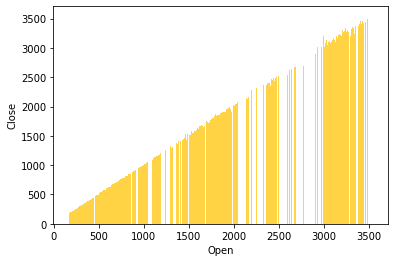

In [ ]:
plt.bar(amzn['Open'], amzn['Close'],width = 5.0, align='center',color='#ffd343')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'Open vs Close')

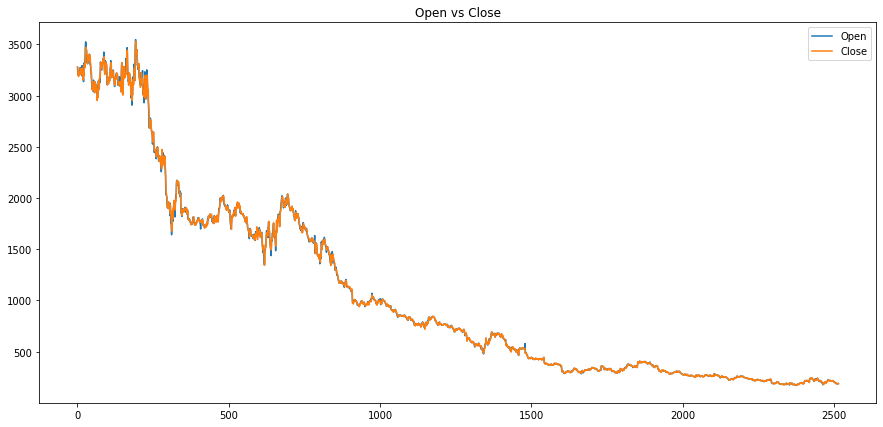

In [ ]:
amzn['Open'].plot(label='Open',figsize=(15,7))
amzn['Close'].plot(label='Close')
plt.legend()
plt.title("Open vs Close")

<h3 style='color:blue'>Relation between Close and Volume</h3>


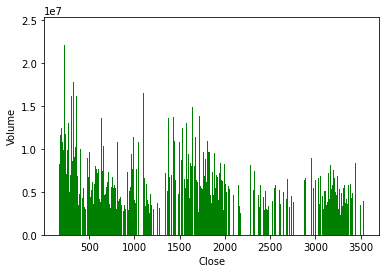

In [ ]:
plt.bar(amzn['Close'], amzn['Volume'],width = 5.0, align='center',color='Green')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.show()

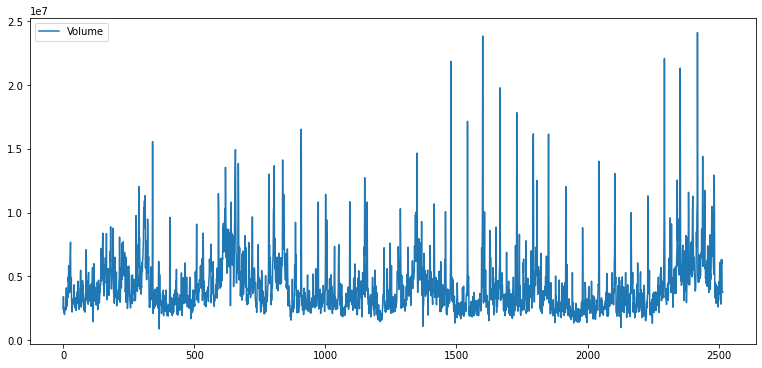

In [ ]:
amzn['Volume'].plot(label='Volume',figsize=(13,6))
plt.legend()

<h3 style='color:blue'>Impact of High on Close</h3>


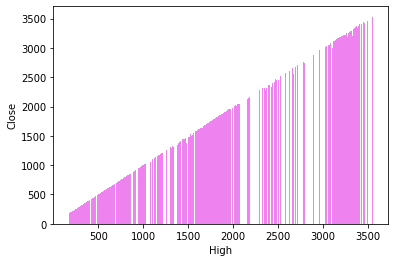

In [ ]:
plt.bar(amzn['High'], amzn['Close'],width = 5.0, align='center',color='violet')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'High vs Close')

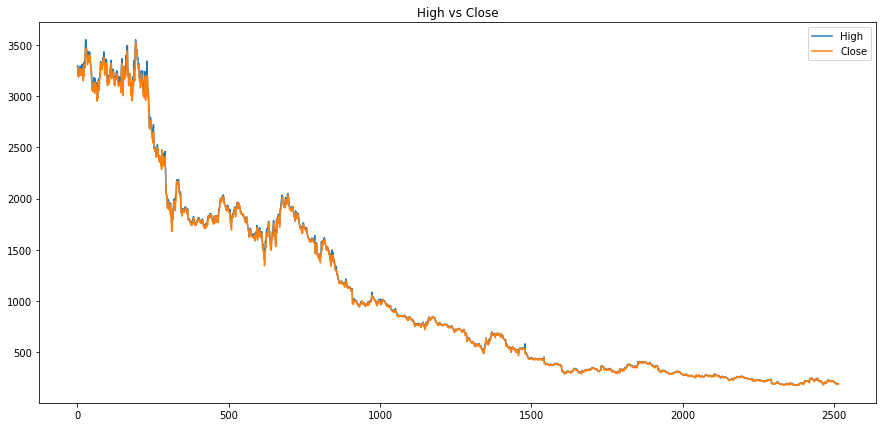

In [ ]:
amzn['High'].plot(label='High',figsize=(15,7))
amzn['Close'].plot(label='Close')
plt.legend()
plt.title("High vs Close")

<h3 style='color:blue'>Impact of Low on Close</h3>

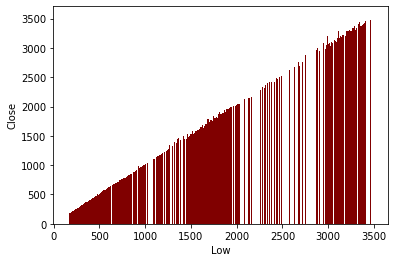

In [ ]:
plt.bar(amzn['Low'], amzn['Close'],width = 5.0, align='center',color='maroon')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'Close vs Low')

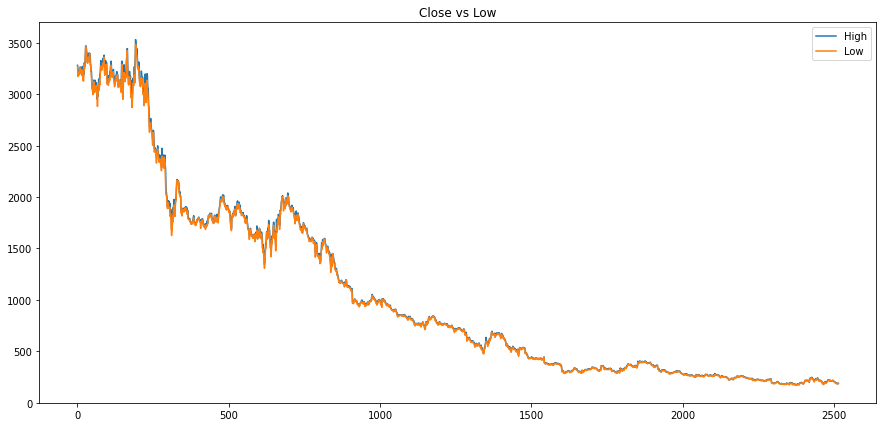

In [ ]:
amzn['Close'].plot(label='High',figsize=(15,7))
amzn['Low'].plot(label='Low')
plt.legend()
plt.title("Close vs Low")

<h3 style='color:blue'>Impact of High on Low</h3>

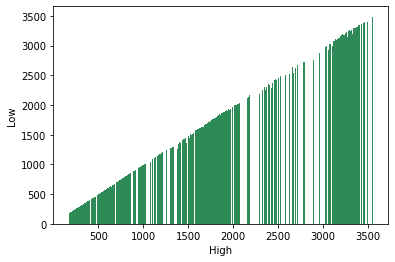

In [ ]:
plt.bar(amzn['High'], amzn['Low'],width = 5.0, align='center',color = 'seagreen')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

Text(0.5, 1.0, 'High vs Low')

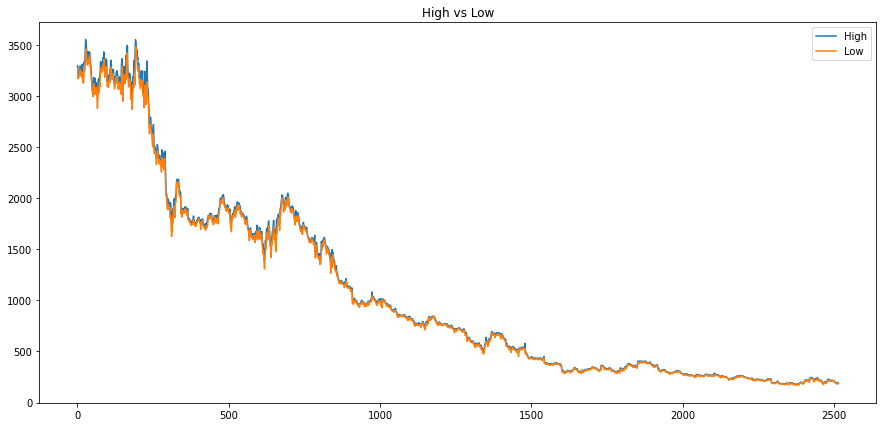

In [ ]:
amzn['High'].plot(label='High',figsize=(15,7))
amzn['Low'].plot(label='Low')
plt.legend()
plt.title("High vs Low")

<h3 style='color:blue'>Correlation between features</h3>

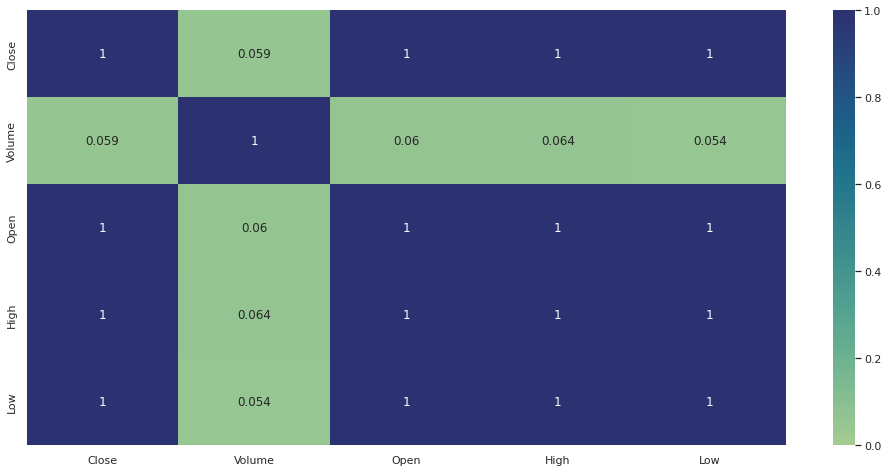

In [ ]:
sns.set_theme()
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(amzn.corr(), annot = True ,vmin=0, vmax=1,cmap ='crest')

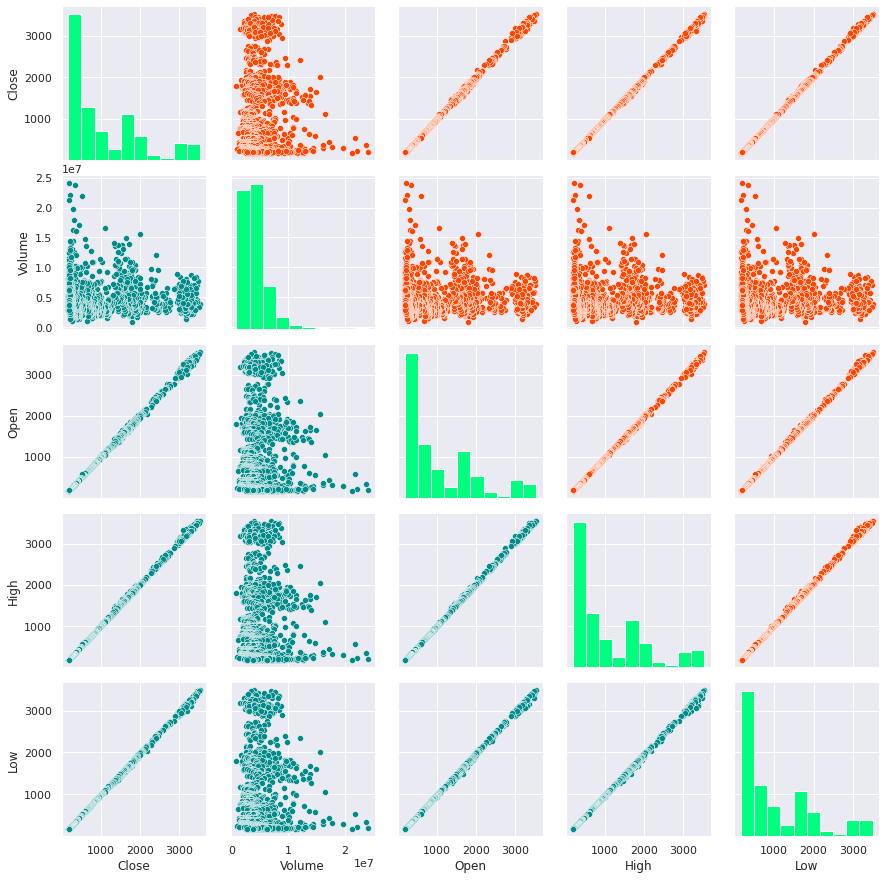

In [ ]:
g = sns.PairGrid(amzn)
g.map_upper(sns.scatterplot,color='orangered')
g.map_lower(sns.scatterplot, color='darkcyan')
g.map_diag(plt.hist,color = 'springgreen')

Text(0.5, 1.0, 'Relation between Close, Open, High and Low ')

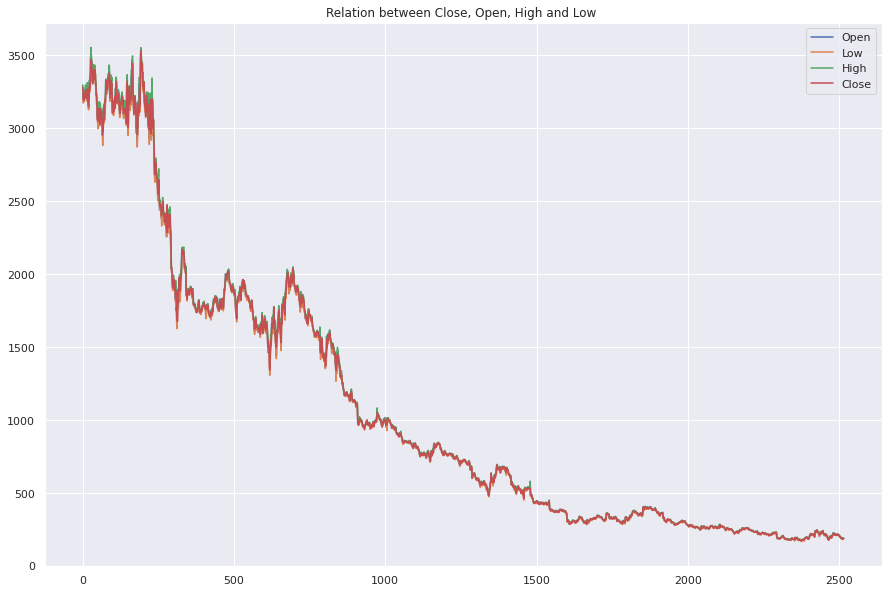

In [ ]:
amzn['Open'].plot(label='Open',figsize=(15,10))
amzn['Low'].plot(label='Low')
amzn['High'].plot(label='High')
amzn['Close'].plot(label='Close')
plt.legend()
plt.title("Relation between Close, Open, High and Low ")

<h3 style='color:blue'>From  the  above  plots  and  graphs, we  can  understand  that  the  features  Close , high , Low and  Open  have  linear     relationship  among  them</h3>

<h2 style='color:blue'>NLP for news headlines dataset</h2>

**Reading headlines data**

In [ ]:
uploaded = files.upload()

Saving Headlines_2015.csv to Headlines_2015.csv
Saving Headlines_2016.csv to Headlines_2016.csv
Saving Headlines_2017.csv to Headlines_2017.csv
Saving Headlines_2018.csv to Headlines_2018.csv
Saving Headlines_2019.csv to Headlines_2019.csv
Saving Headlines_2020.csv to Headlines_2020.csv
Saving Headlines_2021.csv to Headlines_2021.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['Headlines_2015.csv']),encoding='ISO-8859-1')
df2 = pd.read_csv(io.BytesIO(uploaded['Headlines_2016.csv']),encoding='ISO-8859-1')
df3 = pd.read_csv(io.BytesIO(uploaded['Headlines_2017.csv']),encoding='ISO-8859-1')
df4 = pd.read_csv(io.BytesIO(uploaded['Headlines_2018.csv']),encoding='ISO-8859-1')
df5 = pd.read_csv(io.BytesIO(uploaded['Headlines_2019.csv']),encoding='ISO-8859-1')
df6 = pd.read_csv(io.BytesIO(uploaded['Headlines_2020.csv']),encoding='ISO-8859-1')
df7 = pd.read_csv(io.BytesIO(uploaded['Headlines_2021.csv']),encoding='ISO-8859-1')

In [ ]:
#Concatenating all news data into one
news=pd.concat([df1,df2,df3,df4,df5,df6,df7])
news

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...


In [ ]:
news.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [ ]:
news.head(10)

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
5,2015-01-06,"Technology Transforming Cars Into ""Phones On W..."
6,2015-01-07,Apple issues fourth developer beta of OS X 10....
7,2015-01-08,Apple company recalls 2014 shipments after lin...
8,2015-01-09,Samsung is reportedly making a secret new chip...
9,2015-01-10,"Eight years ago, Steve Jobs unveiled iPhone an..."


In [ ]:
news.tail()

,Date,Headlines
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...
173,2021-06-23,French court sets date in Apple case over App ...


In [ ]:
news.dtypes

Date         object
Headlines    object
dtype: object

<h3 style='color:blue'>Changing types of objects</h3>

In [ ]:
news['Date']=pd.to_datetime(news['Date'],format='%Y/%m/%d')
news["Headlines"]=news["Headlines"].astype(str)
news.dtypes

Date         datetime64[ns]
Headlines            object
dtype: object

In [ ]:
#Datacleaning and pre-processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
news["Headlines"]=news["Headlines"].astype(str)
news['Headlines']=news['Headlines'].apply(lambda x: x.lower()) #convert into lowercase

In [ ]:
import string
def char_rmvl(text):                 #Removing all char except a-z and A-Z and replace them with ' '
    new=[char for char in text if char not in string.punctuation]
    new_str=''.join(new)
    new.clear()
    return new_str
news["Headlines"]=news["Headlines"].astype(str)
news['Headlines']=news['Headlines'].apply(char_rmvl)

In [ ]:
#Removing stopwords
stop = stopwords.words('english')
news['Headlines'] = news['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news

,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman sources moats concern applequo...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deals apple watch...
170,2021-06-20,iphone 13 rumors apples fall event gets closer...
171,2021-06-21,apple shortening new free tv plus trials year ...
172,2021-06-22,google likely soon face antitrust claims play ...


<h3 style='color:blue'>Applying Lemmatization</h3>

In [ ]:
#Apply lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  #used to perform lemmatization
def lemmat(text):
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    return ' '.join([lemma.lemmatize(word) for word in words])
news['Headlines'] = news['Headlines'].apply(lemmat)
news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman source moat concern applequots...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deal apple watch ...
170,2021-06-20,iphone 13 rumor apple fall event get closer se...
171,2021-06-21,apple shortening new free tv plus trial year t...
172,2021-06-22,google likely soon face antitrust claim play s...


In [ ]:
amzn=pd.merge(amzn,news,on=['Date'],how='outer')
amzn

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,3281.15,2455530.0,3272.87,3297.5800,3270.70,athenahealth set support io 15 feature allows ...
1,2021-06-08,3264.11,3416730.0,3222.61,3279.5321,3218.01,apple chinese manufacturer talk u car battery ...
2,2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.20,applequots new quotprivate relayquot feature a...
3,2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.81,global equity nearly grasp alltime record doll...
4,2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.03,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...,...
3279,2021-06-19,NaN,NaN,NaN,NaN,NaN,best preprime day smartwatch deal apple watch ...
3280,2021-06-20,NaN,NaN,NaN,NaN,NaN,iphone 13 rumor apple fall event get closer se...
3281,2021-06-21,NaN,NaN,NaN,NaN,NaN,apple shortening new free tv plus trial year t...
3282,2021-06-22,NaN,NaN,NaN,NaN,NaN,google likely soon face antitrust claim play s...


In [ ]:
amzn.isnull().sum()

Date           0
Close        748
Volume       748
Open         748
High         748
Low          748
Headlines    919
dtype: int64

In [ ]:
amzn['Close'].fillna(amzn['Close'].mean(), inplace=True)
amzn['Volume'].fillna(amzn['Volume'].mean(), inplace=True)
amzn['Open'].fillna(amzn['Open'].mean(), inplace=True)
amzn['High'].fillna(amzn['High'].mean(), inplace=True)
amzn['Low'].fillna(amzn['Low'].mean(), inplace=True)

In [ ]:
amzn=amzn.fillna('')
amzn.sort_values(ascending = True ,by = 'Date')
amzn

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,3281.150000,2.455530e+06,3272.870000,3297.580000,3270.700000,athenahealth set support io 15 feature allows ...
1,2021-06-08,3264.110000,3.416730e+06,3222.610000,3279.532100,3218.010000,apple chinese manufacturer talk u car battery ...
2,2021-06-07,3198.010000,2.215756e+06,3197.330000,3208.000000,3172.200000,applequots new quotprivate relayquot feature a...
3,2021-06-04,3206.220000,2.249749e+06,3212.000000,3221.000000,3198.810000,global equity nearly grasp alltime record doll...
4,2021-06-03,3187.010000,2.398293e+06,3204.230000,3214.435000,3184.030000,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...,...
3279,2021-06-19,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,best preprime day smartwatch deal apple watch ...
3280,2021-06-20,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,iphone 13 rumor apple fall event get closer se...
3281,2021-06-21,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,apple shortening new free tv plus trial year t...
3282,2021-06-22,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,google likely soon face antitrust claim play s...


In [ ]:
amzn[:].isnull().sum()

Date         0
Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

In [ ]:
amzn.duplicated().sum()

23

In [ ]:
amzn.drop_duplicates(inplace=True,ignore_index=True)
amzn.duplicated().sum()

0

In [ ]:
amzn.dtypes

Date         datetime64[ns]
Close               float64
Volume              float64
Open                float64
High                float64
Low                 float64
Headlines            object
dtype: object

In [ ]:
amzn.set_index("Date", inplace = True)
amzn.head()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,3281.15,2455530.0,3272.87,3297.5800,3270.70,athenahealth set support io 15 feature allows ...
2021-06-08,3264.11,3416730.0,3222.61,3279.5321,3218.01,apple chinese manufacturer talk u car battery ...
2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.20,applequots new quotprivate relayquot feature a...
2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.81,global equity nearly grasp alltime record doll...
2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.03,buy rh stock dip q1 earnings growth wwdc 2021 ...


In [ ]:
amzn.sort_values(ascending = True ,by = 'Date')
amzn

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,3281.150000,2.455530e+06,3272.870000,3297.580000,3270.700000,athenahealth set support io 15 feature allows ...
2021-06-08,3264.110000,3.416730e+06,3222.610000,3279.532100,3218.010000,apple chinese manufacturer talk u car battery ...
2021-06-07,3198.010000,2.215756e+06,3197.330000,3208.000000,3172.200000,applequots new quotprivate relayquot feature a...
2021-06-04,3206.220000,2.249749e+06,3212.000000,3221.000000,3198.810000,global equity nearly grasp alltime record doll...
2021-06-03,3187.010000,2.398293e+06,3204.230000,3214.435000,3184.030000,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...
2021-06-19,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,best preprime day smartwatch deal apple watch ...
2021-06-20,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,iphone 13 rumor apple fall event get closer se...
2021-06-21,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,apple shortening new free tv plus trial year t...


In [ ]:
amzn.duplicated().sum()

2

In [ ]:
amzn

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,3281.150000,2.455530e+06,3272.870000,3297.580000,3270.700000,athenahealth set support io 15 feature allows ...
2021-06-08,3264.110000,3.416730e+06,3222.610000,3279.532100,3218.010000,apple chinese manufacturer talk u car battery ...
2021-06-07,3198.010000,2.215756e+06,3197.330000,3208.000000,3172.200000,applequots new quotprivate relayquot feature a...
2021-06-04,3206.220000,2.249749e+06,3212.000000,3221.000000,3198.810000,global equity nearly grasp alltime record doll...
2021-06-03,3187.010000,2.398293e+06,3204.230000,3214.435000,3184.030000,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...
2021-06-19,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,best preprime day smartwatch deal apple watch ...
2021-06-20,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,iphone 13 rumor apple fall event get closer se...
2021-06-21,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,apple shortening new free tv plus trial year t...


In [ ]:
amzn[:].isnull().sum()

Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

In [ ]:
amzn.tail()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-19,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,best preprime day smartwatch deal apple watch ...
2021-06-20,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,iphone 13 rumor apple fall event get closer se...
2021-06-21,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,apple shortening new free tv plus trial year t...
2021-06-22,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,google likely soon face antitrust claim play s...
2021-06-23,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,french court set date apple case app store dev...


In [ ]:
print(f'Dataframe contains stock prices from {amzn.index.min()} to {amzn.index.max()}')
print(f'Total no.of days = {(amzn.index.max()- amzn.index.min()).days} days')

Dataframe contains stock prices from 2011-06-10 00:00:00 to 2021-06-23 00:00:00
Total no.of days = 3666 days


<h3 style='color:blue'>Sentiment Analysis on Headlines</h3>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
amzn['compound'] = amzn['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
amzn['negative'] = amzn['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
amzn['neutral'] = amzn['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
amzn['positive'] = amzn['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])


In [ ]:
from scipy import stats

In [ ]:
# Adding Subjectivity and Polarity columns
from sklearn.metrics import accuracy_score,classification_report
from textblob import TextBlob
def getsubj(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity


In [ ]:
amzn['Subjectivity']=amzn['Headlines'].apply(getsubj)
amzn['Polarity']=amzn['Headlines'].apply(getpolarity)
amzn

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,,
2021-06-09,3281.150000,2.455530e+06,3272.870000,3297.580000,3270.700000,athenahealth set support io 15 feature allows ...,0.9905,0.051,0.850,0.099,0.372039,0.111292
2021-06-08,3264.110000,3.416730e+06,3222.610000,3279.532100,3218.010000,apple chinese manufacturer talk u car battery ...,0.9972,0.037,0.830,0.133,0.441778,0.148372
2021-06-07,3198.010000,2.215756e+06,3197.330000,3208.000000,3172.200000,applequots new quotprivate relayquot feature a...,0.9972,0.023,0.869,0.109,0.472968,0.174002
2021-06-04,3206.220000,2.249749e+06,3212.000000,3221.000000,3198.810000,global equity nearly grasp alltime record doll...,0.9953,0.038,0.849,0.113,0.406474,0.112212
2021-06-03,3187.010000,2.398293e+06,3204.230000,3214.435000,3184.030000,buy rh stock dip q1 earnings growth wwdc 2021 ...,0.9926,0.059,0.822,0.119,0.323765,0.088232
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,best preprime day smartwatch deal apple watch ...,0.9910,0.029,0.796,0.175,0.391640,0.148395
2021-06-20,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,iphone 13 rumor apple fall event get closer se...,0.9947,0.039,0.777,0.184,0.372926,0.308141
2021-06-21,1069.070369,4.194975e+06,1069.514611,1080.592716,1056.911941,apple shortening new free tv plus trial year t...,0.9988,0.040,0.777,0.183,0.362845,0.272403


In [ ]:
# Extracting data req for model building
amzn = amzn[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume','Subjectivity','Polarity']]
amzn.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Subjectivity,Polarity
Date,,,,,,,,,,,
2021-06-09,3281.15,0.9905,0.051,0.850,0.099,3272.87,3297.5800,3270.70,2455530.0,0.372039,0.111292
2021-06-08,3264.11,0.9972,0.037,0.830,0.133,3222.61,3279.5321,3218.01,3416730.0,0.441778,0.148372
2021-06-07,3198.01,0.9972,0.023,0.869,0.109,3197.33,3208.0000,3172.20,2215756.0,0.472968,0.174002
2021-06-04,3206.22,0.9953,0.038,0.849,0.113,3212.00,3221.0000,3198.81,2249749.0,0.406474,0.112212
2021-06-03,3187.01,0.9926,0.059,0.822,0.119,3204.23,3214.4350,3184.03,2398293.0,0.323765,0.088232


In [ ]:
amzn.dtypes

Close           float64
compound        float64
negative        float64
neutral         float64
positive        float64
Open            float64
High            float64
Low             float64
Volume          float64
Subjectivity    float64
Polarity        float64
dtype: object

In [ ]:
amzn_final = amzn

In [ ]:
amzn.to_csv('amzn_final.csv')
files.download('amzn_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h3 style='color:blue'>Model Building</h3>

<h3 style='color:blue'>Building Linear Regression model</h3>

**Splitting dataset into train test split**

In [ ]:
X = amzn.loc[:,'compound':'Polarity']
y = amzn['Close']

In [ ]:
from sklearn.model_selection import train_test_split #for building regression model
from sklearn.preprocessing import MinMaxScaler  #For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse   #For model evaluation
from sklearn.metrics import r2_score    

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

**Fitting the model**

In [ ]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(l.intercept_)

0.25365208101175085


In [ ]:
yhat=l.predict(X_test)

In [ ]:
# Actual vs Predicted prizes
dframe = pd.DataFrame(y_test,yhat)
dfr=pd.DataFrame({"Actual_price":y_test,"Predicted_price":yhat})
dfr

,Actual_price,Predicted_price
Date,,
2016-03-25,1069.070369,1069.466575
2015-06-16,427.260000,426.904488
2016-10-16,1069.070369,1069.580444
2017-11-06,1120.660000,1122.334884
2017-01-21,1069.070369,1068.713049
...,...,...
2017-05-12,961.350000,959.548174
2021-04-13,3400.000000,3421.982917
2017-01-20,808.330000,809.613490


Text(0.5, 1.0, 'Actual vs Predicted')

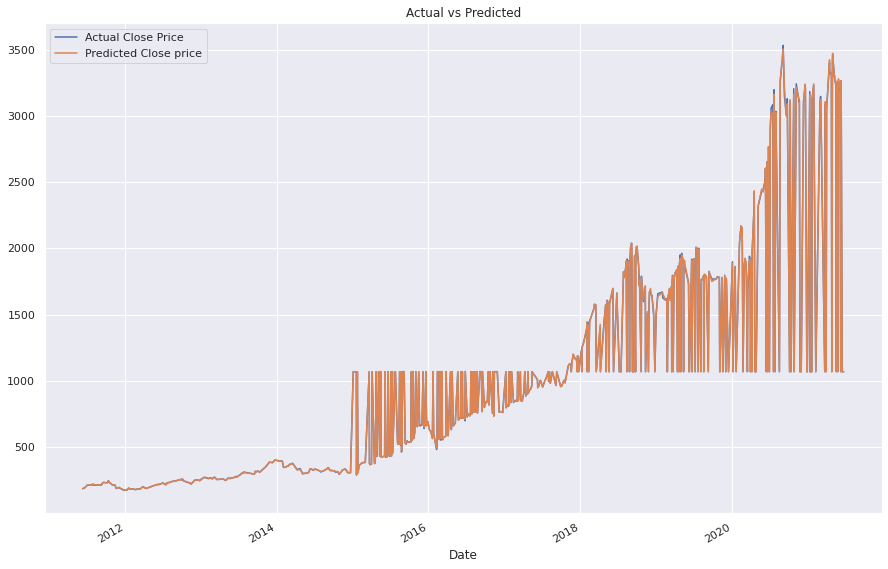

In [ ]:
dfr['Actual_price'].plot(label='Actual Close Price',figsize=(15,10))
dfr['Predicted_price'].plot(label='Predicted Close price')
plt.legend()
plt.title("Actual vs Predicted")

<h3 style='color:blue'>Accuracy of the model</h3>

In [ ]:
l.score(X_test,y_test)*100

99.98793936315894

In [ ]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,l.predict(X_train))}\t{r2_score(y_test,l.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9998941649898474	0.9998793936315895



In [ ]:
#use k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.99987939, 0.99992295, 0.99987031, 0.99989237, 0.99990728])

**We can see that in 5 iterations we get a score above 99.9% all the time. This is very good but we want to test few other algorithms to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Finding best model using GridSearchCV</h2>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear_Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'KNN':{
            'model':KNeighborsRegressor(),
            'params':{
                'n_neighbors':[3,4,5,6,7],
                'weights':['uniform','distance']
            }
        },
        'Decision_Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[100,150],
                'random_state':[0]
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #No.of cross validations
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False) 
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

,model,best_score,best_params
0,Linear_Regression,0.999894,{'normalize': False}
1,KNN,0.176724,"{'n_neighbors': 4, 'weights': 'distance'}"
2,Decision_Tree,0.999542,"{'criterion': 'mse', 'splitter': 'best'}"
3,Random_forest,0.999721,"{'n_estimators': 150, 'random_state': 0}"


**From the above results,we can conclude that Linear regression is giving maximum accuracy.So,we use Linear regression model from Machine learning techniques and we will further test LSTM model which is a recurrent nueral networks**

In [ ]:
import datetime
last_day = amzn.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-24 00:00:00


<h3 style='color:blue'>Predicting Close value of a day on given Open , high , Low , Volume and Headline of that day </h3>

In [ ]:
X.columns

Index(['compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low',
       'Volume', 'Subjectivity', 'Polarity'],
      dtype='object')

In [ ]:
# Functions to predict Close

def Convert(Headlines):
    Headline = list(Headlines.split("-"))
    return Headline

def filter(Headline):
    Head = [ x.lower() for x in Headline]
    Head = [char_rmvl(x) for x in Head]
    Head = [' '.join([word for word in s.split() if word not in (stop)]) for s in Head]
    Head = [lemmat(s) for s in Head]
    return Head

def sent_anls(Head):
    compound = [sid.polarity_scores(x)['compound'] for x in Head]
    negative = [sid.polarity_scores(x)['neg'] for x in Head]
    neutral = [sid.polarity_scores(x)['neu'] for x in Head]
    positive = [sid.polarity_scores(x)['pos'] for x in Head]
    subjectivity = [getsubj(x) for x in Head]
    polarity = [getpolarity(x) for x in Head]

    return compound,negative,neutral,positive,subjectivity,polarity




def predict_price(Open,High,Low,Volume,Headlines):
    head = filter(Headlines)
    cmpd,negt,neut,post,subj,pol = sent_anls(head)
    af = pd.DataFrame()
    af['compound'] = cmpd
    af['negative'] = negt
    af['neutral'] = neut
    af['positive'] = post
    af['Open'] = Open 
    af['High'] = High
    af['Low'] = Low
    af['Volume'] = Volume
    af['Subjectivity'] = subj
    af['Polarity'] = pol
    return l.predict(af)[0]
  

**Predicting Close on given input values**

In [ ]:
prediction = predict_price(3272.87,3297.5800,3270.7000,2455530,'athenahealth is set to support the iOS 15 Feature that allows Patients to Share their Apple Health app Data with their Providers Buy Adobe Stock Before Q2 Earnings as a Long-Term Tech Hold? WWDC 2021: Apple Quietly Reinforces Its Moat EU trustbusters target Apple&quot;s Siri and other voice assistants Apple&quot;s First AR Headset To Launch In Q2 of 2022 Apple&quot;s First AR Headset To Launch In Q2 of 2022 The U.S. House of Representatives is working to introduce Five Antitrust Bills in the next week that will Squarely affect Apple and its App Store Carolyn Everson has left Facebook and is reportedly eyeing a CEO role Apple Podcasts to Launch In-app Subscriptions Globally On June 15: Report Feature: Why Did Fastly Stock Soar on the Day of the Outage? Think Apple. Several macOS Monterey Features Unavailable on Intel-Based Macs Several macOS Monterey Features Unavailable on Intel-Based Macs Apple may have accidentally confirmed the existence of an M1X MacBook Pro Apple and Facebook need each other more than they&quot;d ever admit Apple is Set to Launch its Podcasts Subscriptions Platform Next Week EU Antitrust Watchdog Raise Concerns Overs Alexa, Siri, Google&quot;s Voice Assistant Dominance: Reuters The creator economy is running into the Apple Tax - this startup is fighting back Facebook first-ever smartwatch will reportedly have two cameras and roll out next summer The Newton lives, kinda: Boffin turns Apple eMate 300 into Raspberry Pi laptop Mirrored Apple (mAAPL) Trading Up 2.2% This Week Lose the use of Apple&quot;s iCloud, and you lose more than storage Early Prime Day Apple Watch deals: Save $70 on a Series 6     - CNET Applebee&quot;s offered free appetizers in hopes of luring in 10,000 job candidates and more than 40,000 applied Pro: Facebook stock is still trading at a &quot;reasonable price&quot; Stock Market Today With Jim Cramer: FAANG and Clover Health Apple Podcasts subscriptions rolling out next week Facebook aiming smartwatch at summer 2022 release, with two cameras Apple&quot;s most exciting WWDC 2021 announcements for iPhone, Mac and more     - CNET Here are the most important new features coming to your iPhone this fall Apple Podcasts says it&quot;ll launch in-app subscriptions globally on June 15th WWDC 2021: Nothing in Apple&quot;s Developer Keynote Will Move the Bar on Apple Stock 10 Information Technology Stocks With Unusual Options Alerts In Today&quot;s Session Salesforce Says Up to 60% of Its Employees Will Work From Home Post-Pandemic Salesforce Says Up to 60% of Its Employees Will Work From Home Post-Pandemic Here&quot;s Why ClearBridge Reduced its Apple (AAPL) Stake Here&quot;s Why ClearBridge Reduced its Apple (AAPL) Stake Google Relaxes Search Engine Dominance Practices On European Android Ferrari Appoints STMicroelectronics Exec as New CEO 3 Top Tech Stocks to Buy During a Recession Apple Maps is getting a major makeover in iOS 15     - Roadshow New iPhone Health app feature gives doctors easier access to data Skyworks Solutions or Qorvo: Which 5G Stock Should You Buy With $200? MacOS Monterey: What you should know about Apple&quot;s latest Mac software update     - CNET Apple Stock Is Near Perfect, So Trade it With Confidence Apple and Snap Pick Up Where Pokemon Go Left Off iOS 15&quot;s most exciting new features: FaceTime, iMessages and Apple Wallet get new tricks     - CNET Music Streaming Stocks to Watch as Distancing Aids Adoption The Apple Watch Series 6 is $70 off What Netflix Needs to Do to Reach $1,000 Best Apple AirPods deals before Prime Day: Save $52 on AirPods Pro, $30 off AirPods Max     - CNET Why Quotient Technology Stock Fell 28% in May Cerner becomes EHR partner for new Apple feature Big tech companies resume hunt for Silicon Valley offices Big tech companies resume hunt for Silicon Valley offices 3 Must-See Takeaways From Apple&quot;s Big Event WWDC: Universal Control on the Mac and iPad explained WWDC: Universal Control on the Mac and iPad explained 4 Stocks to Capitalize on the Booming Virtual Reality Market 4 Stocks to Capitalize on the Booming Virtual Reality Market US-China Tech War: American Tech Bill Locks Huawei On Washington&quot;s Trade Blacklist As The Company Plays Up Its Cybersecurity Credentials Realme to launch its first laptop in India soon, may come with MacBook Air-like design 1 Popular Tech Stock to Avoid The Apple Gadgets You Should---and Shouldn&quot;t---Buy Right Now Why Netflix&quot;s Leading Position in Streaming May Be In Trouble Semiconductor Watchlist: Jim Cramer Says To Own Nvidia, AMD and Broadcom 5 Stocks Set to Gain From the Ongoing 5G Boom 5 Stocks Set to Gain From the Ongoing 5G Boom Wall Street Breakfast: Countering China 4 new ways Apple amps up your privacy on iOS 15: Siri, Mail and more     - CNET If You Want to Live in Apple World, Gather All Your iDevices ICYMI: Jim Cramer Live From NYSE Trading Floor Will Illumina Be a Trillion-Dollar Stock by 2035? The Zacks Analyst Blog Highlights: Google, Apple, Dow, Zoom and The Sherwin-Williams Co Leonard Rickey Investment Advisors P.L.L.C. Reduces Holdings in Apple Inc. (NASDAQ:AAPL) KFA Private Wealth Group LLC Has $3.45 Million Position in Apple Inc. (NASDAQ:AAPL) Apple Xcode 13 supports teams, Swift concurrency Apple In Talks With Chinese Manufacturers Over U.S. EV Battery Plant - Report Apple In Talks With Chinese Manufacturers Over U.S. EV Battery Plant - Report Apple Will Find It Hard To Recover From Fallout Over App Store Policies, Says Bill Gurley Ocean Capital Management LLC Raises Holdings in Apple Inc. (NASDAQ:AAPL) Apple settles lawsuit after iPhone techs posted woman&quot;s explicit photos on Facebook, report says Apple pays millions of dollars to student after repair staff leak her explicit photos online Apple Inc. (NASDAQ:AAPL) Shares Sold by Bridge Advisory LLC With an improved FaceTime, Apple is seeking a piece of Zoom&quot;s action Avion Wealth Decreases Holdings in Apple Inc. (NASDAQ:AAPL) Apple just showed us how it could finally bring iMessage to Android HBO Max update fixes the worst of its Apple TV woes Supply chain gearing up shipments for new MacBook Pro Apple has recorded its best-ever quarterly sales of laptops and tablets in India Apple Pays Multimillion Dollar Settlement to Woman Whose Explicit Photos Are Leaked by iPhone Repair Techs Global tax still far from becoming reality Big countries&quot; tax deal to reveal rift in Europe Apple EV Could be Too Late in the Game Notes Tesla Bull  Apple Starts While Tesla Moves to Autonomous Robots Analysts Have Conflicting Sentiments on These Technology Companies: Apple (AAPL), Boeing (BA) and Airbus Group SE (OtherEADSF) Apple Shazam Brings &quot;ShazamKit&quot; for Third-Party Apps to Recognize Beats, Hums-Coming to Android Apple doubles down on privacy in new iPhone software Report: Apple in Talks Over Batteries for Apple Car Report: Apple in Talks Over Batteries for Apple Car Apple Brings Back Magnifying Glass For Selecting Text In iOS 15 Apple Brings Back Magnifying Glass For Selecting Text In iOS 15')

In [ ]:
print("Close :" ,prediction)

Close : 3290.2528570579034


<h2 style='color:blue'>Predicting Upcoming 30 days trend of Close price  using Stacked LSTM</h2>


In [ ]:
#Reading historical data
df= pd.read_csv('HistoricalData_AMZN.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,06/08/2021,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,06/07/2021,$3198.01,2215756,$3197.33,$3208,$3172.2
3,06/04/2021,$3206.22,2249749,$3212,$3221,$3198.81
4,06/03/2021,$3187.01,2398293,$3204.23,$3214.435,$3184.03


In [ ]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2511,06/16/2011,$183.65,6025431,$185.74,$187,$181.59
2512,06/15/2011,$185.98,6310918,$188.04,$192.45,$185.3
2513,06/14/2011,$189.96,3952911,$188.99,$190.72,$187.07
2514,06/13/2011,$186.29,3867735,$186.81,$189.31,$184.86
2515,06/10/2011,$186.53,3753267,$189.25,$190.77,$186.28


In [ ]:
df['Date']= pd.to_datetime(df['Date'])
df['Date']= pd.to_datetime(df['Date'].dt.strftime("%m/%d/%Y"))
print(df)

           Date Close/Last   Volume      Open        High       Low
0    2021-06-09   $3281.15  2455530  $3272.87    $3297.58   $3270.7
1    2021-06-08   $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2    2021-06-07   $3198.01  2215756  $3197.33       $3208   $3172.2
3    2021-06-04   $3206.22  2249749     $3212       $3221  $3198.81
4    2021-06-03   $3187.01  2398293  $3204.23   $3214.435  $3184.03
...         ...        ...      ...       ...         ...       ...
2511 2011-06-16    $183.65  6025431   $185.74        $187   $181.59
2512 2011-06-15    $185.98  6310918   $188.04     $192.45    $185.3
2513 2011-06-14    $189.96  3952911   $188.99     $190.72   $187.07
2514 2011-06-13    $186.29  3867735   $186.81     $189.31   $184.86
2515 2011-06-10    $186.53  3753267   $189.25     $190.77   $186.28

[2516 rows x 6 columns]


In [ ]:
df=df.rename(columns={'Close/Last':'Close'})

In [ ]:
#Removing $
df['Close']= df['Close'].str.replace('$','')
df['Open']= df['Open'].str.replace('$','')
df['High']= df['High'].str.replace('$','')
df['Low']= df['Low'].str.replace('$','')
print(df)

           Date    Close   Volume     Open       High      Low
0    2021-06-09  3281.15  2455530  3272.87    3297.58   3270.7
1    2021-06-08  3264.11  3416730  3222.61  3279.5321  3218.01
2    2021-06-07  3198.01  2215756  3197.33       3208   3172.2
3    2021-06-04  3206.22  2249749     3212       3221  3198.81
4    2021-06-03  3187.01  2398293  3204.23   3214.435  3184.03
...         ...      ...      ...      ...        ...      ...
2511 2011-06-16   183.65  6025431   185.74        187   181.59
2512 2011-06-15   185.98  6310918   188.04     192.45    185.3
2513 2011-06-14   189.96  3952911   188.99     190.72   187.07
2514 2011-06-13   186.29  3867735   186.81     189.31   184.86
2515 2011-06-10   186.53  3753267   189.25     190.77   186.28

[2516 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular

In [ ]:
df.iloc[::-1]

,Date,Close,Volume,Open,High,Low
2515,2011-06-10,186.53,3753267,189.25,190.77,186.28
2514,2011-06-13,186.29,3867735,186.81,189.31,184.86
2513,2011-06-14,189.96,3952911,188.99,190.72,187.07
2512,2011-06-15,185.98,6310918,188.04,192.45,185.3
2511,2011-06-16,183.65,6025431,185.74,187,181.59
...,...,...,...,...,...,...
4,2021-06-03,3187.01,2398293,3204.23,3214.435,3184.03
3,2021-06-04,3206.22,2249749,3212,3221,3198.81
2,2021-06-07,3198.01,2215756,3197.33,3208,3172.2
1,2021-06-08,3264.11,3416730,3222.61,3279.5321,3218.01


In [ ]:
df1=df.reset_index()['Close']
df1

0       3281.15
1       3264.11
2       3198.01
3       3206.22
4       3187.01
         ...   
2511     183.65
2512     185.98
2513     189.96
2514     186.29
2515     186.53
Name: Close, Length: 2516, dtype: object

**LSTM are sensitive to the scale of the data.So we apply Min Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # To transform values of different scales into a scale between 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) 
print(df1)

[[0.92546935]
 [0.92039543]
 [0.90071315]
 ...
 [0.00502032]
 [0.00392752]
 [0.00399899]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1635, 881)

In [ ]:
train_data

array([[0.92546935],
       [0.92039543],
       [0.90071315],
       ...,
       [0.03996605],
       [0.03997797],
       [0.03952536]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99--X   100--Y 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1534, 100)
(1534,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #Xtrain shape = 100
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks= [early_stop])

Epoch 1/100
24/24 [==============================] - 9s 243ms/step - loss: 0.0276 - val_loss: 0.0104
Epoch 2/100
24/24 [==============================] - 4s 186ms/step - loss: 0.0022 - val_loss: 4.0095e-05
Epoch 3/100
24/24 [==============================] - 4s 184ms/step - loss: 8.5459e-04 - val_loss: 4.9008e-04
Epoch 4/100
24/24 [==============================] - 4s 188ms/step - loss: 6.3629e-04 - val_loss: 8.4109e-05
Epoch 5/100
24/24 [==============================] - 4s 186ms/step - loss: 6.4975e-04 - val_loss: 1.0433e-04
Epoch 6/100
24/24 [==============================] - 4s 186ms/step - loss: 6.1333e-04 - val_loss: 7.5235e-05
Epoch 7/100
24/24 [==============================] - 4s 186ms/step - loss: 5.9546e-04 - val_loss: 4.7397e-05
Epoch 7: early stopping


In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1592.1437236627808

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

287.4732757528635

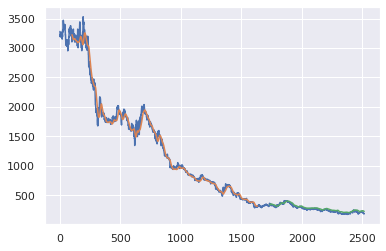

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

881

In [ ]:
881-100

781

In [ ]:
x_input=test_data[781:].reshape(1,-1) #we take data from 781 to 881 (100 days)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.012032694626825678,
 0.013167180311760236,
 0.01002873434871291,
 0.007533461372400144,
 0.016094212931945746,
 0.019208837673262168,
 0.018366161954531245,
 0.018017776586716695,
 0.017398424821713047,
 0.021075825926422202,
 0.020614289755385838,
 0.021918501645153125,
 0.018774100376673077,
 0.01897062545595308,
 0.018574597644676706,
 0.01733589411466941,
 0.015376598627302097,
 0.014414816799916623,
 0.013815713073384257,
 0.011731951702472938,
 0.011577113761222023,
 0.012842616165676592,
 0.014691738502538444,
 0.01685649202733485,
 0.015218783033334828,
 0.01689817916536395,
 0.015040123870353007,
 0.014926973067131179,
 0.017499665014069417,
 0.017910581088927603,
 0.02042371998153856,
 0.019712060982327632,
 0.0159840397814403,
 0.014730447987851177,
 0.013825241562076616,
 0.012940878705316607,
 0.011401432250956571,
 0.013149314395462054,
 0.013935414712582077,
 0.012827727902094778,
 0.010987538523382016,
 0.011743862313338398,
 0.012544850894040234,
 0.0112614825732874

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01428542]
101
1 day input [0.01316718 0.01002873 0.00753346 0.01609421 0.01920884 0.01836616
 0.01801778 0.01739842 0.02107583 0.02061429 0.0219185  0.0187741
 0.01897063 0.0185746  0.01733589 0.0153766  0.01441482 0.01381571
 0.01173195 0.01157711 0.01284262 0.01469174 0.01685649 0.01521878
 0.01689818 0.01504012 0.01492697 0.01749967 0.01791058 0.02042372
 0.01971206 0.01598404 0.01473045 0.01382524 0.01294088 0.01140143
 0.01314931 0.01393541 0.01282773 0.01098754 0.01174386 0.01254485
 0.01126148 0.00995429 0.00779252 0.0056367  0.0061429  0.0060893
 0.00132208 0.00173597 0.00280495 0.00679798 0.00731907 0.00888829
 0.00869475 0.00752155 0.006262   0.00952551 0.00613396 0.00881385
 0.00845058 0.01097563 0.01149374 0.01435824 0.01471556 0.01512648
 0.01471496 0.0122322  0.01202674 0.01292897 0.01194337 0.01264014
 0.01338753 0.01144312 0.01184212 0.01110069 0.01202972 0.01135379
 0.01174684 0.01345303 0.01299448 0.01223518 0.01193741 0.01083568
 0.00934685 0.00925454 0.00870963 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2516

In [ ]:
len(df1) - 100

2416

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

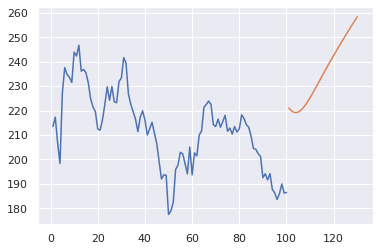

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2416:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig("amzn_30_day.png")
files.download("amzn_30_day.png")

**The above plot displays the Close Price prediction for next 30 days.The "Blue" graph displays the prev 100 days trend and the "Orange" graph displays the next 30 days predicted trend.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

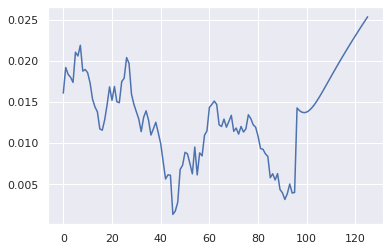

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2420:])
plt.savefig("amzn_30_day_join.png")
files.download("amzn_30_day_join.png")

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

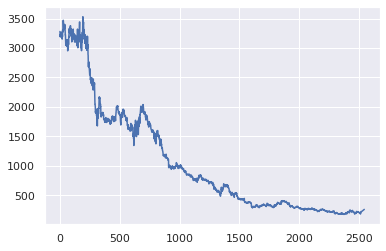

In [ ]:
plt.plot(df3)

In [ ]:
#Saving model
import pickle
pickle_out = open("model_amzn.pkl","wb")
pickle.dump(l,pickle_out)
files.download('model_amzn.pkl')
pickle_out.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>